In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
import glob
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib notebook

pd.options.display.float_format = '{:.2f}'.format


In [4]:
#Read property tax data
input_tax_file = os.path.join('Clean Data','Property tax data','Combined_tax_data.csv')
input_tax_df = pd.read_csv(input_tax_file)

input_tax_df.head()

,Municipality,County,County Rate Share,School Rate Share,Municipal Rate Share,Total County Rate,Avg Property value(in $),Year
0,Absecon City,Atlantic,0.28,0.99,0.69,1.96,251077.60,2010
1,Atlantic City City,Atlantic,0.26,0.58,0.97,1.81,252444.93,2010
2,Brigantine City,Atlantic,0.29,0.36,0.43,1.09,525667.73,2010
3,Buena Borough,Atlantic,0.33,1.20,0.80,2.33,182750.18,2010
4,Buena Vista Township,Atlantic,0.32,1.19,0.35,1.87,218248.74,2010


In [5]:
grouped_by_county = input_tax_df.groupby(['County']).mean()
grouped_by_county

,County Rate Share,School Rate Share,Municipal Rate Share,Total County Rate,Avg Property value(in $),Year
County,,,,,,
Atlantic,0.53,1.44,0.86,2.83,249171.87,2015.00
Bergen,0.26,1.40,0.76,2.42,542585.91,2015.00
Burlington,0.44,1.75,0.64,2.83,229993.09,2015.00
Camden,0.92,1.86,1.25,4.03,213025.05,2015.00
Cape May,0.25,0.49,0.44,1.17,522865.37,2014.99
Cumberland,1.16,1.25,0.62,3.02,143196.73,2014.99
Essex,0.54,1.40,1.17,3.11,456581.64,2015.00
Gloucester,0.74,1.98,0.88,3.60,191642.64,2015.00
Hudson,1.13,1.90,2.69,5.70,191379.99,2014.99


<IPython.core.display.Javascript object>


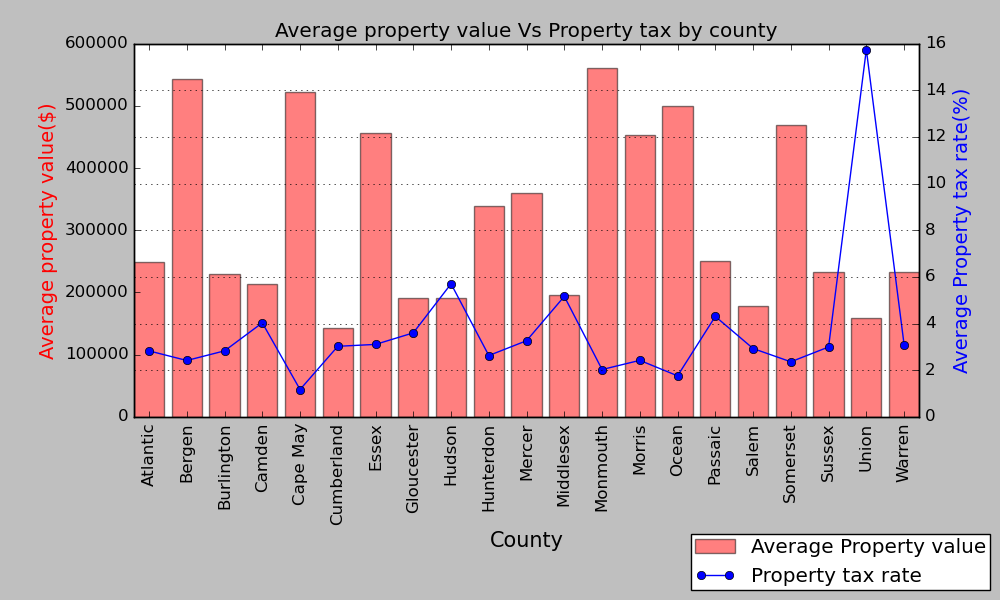

In [6]:
plt.style.use('classic')
fig,ax = plt.subplots(1,1,figsize=(10,6))
# make a plot
x_axis = grouped_by_county.index
y1_axis = grouped_by_county['Avg Property value(in $)']
y2_axis = grouped_by_county['Total County Rate']

ax.bar(x_axis, y1_axis, color="red",alpha = 0.5,label = "Average Property value")

ax.set_xlabel("County",fontsize=15,)
ax.set_ylabel("Average property value($)",color="red",fontsize=14)
plt.xticks(rotation = 90)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y2_axis,color="blue",marker="o",label = "Property tax rate")
ax2.set_ylabel("Average Property tax rate(%)",color="blue",fontsize=14)
fig.legend(loc = "lower right",borderpad=0.20)
#ax2.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

plt.title("Average property value Vs Property tax by county")
plt.grid(True)

plt.savefig("County with avg tax and property value.png")
plt.show()
plt.tight_layout()